In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C97137487"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20800
21000
21200
21400
21600
21800
22000
22200
22400
22600
22800
23000
23200
23400
23600
23800
24000
24200
24400
24600
24800
25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29200
29400
29600
29800
30000
30200
30400
30600
30800
31000
31200
31400
31600
31800
32000
32200
32400
32600
32800
33000
33200
33400
33600
33800
34000
34200
34400
34600
34800
35000
352

In [3]:
works_json

[{'id': 'https://openalex.org/W2023390323',
  'title': 'Rationale for mixing exact exchange with density functional approximations',
  'publication_year': 1996,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5014987686',
     'display_name': 'John P. Perdew',
     'orcid': 'https://orcid.org/0000-0003-4237-824X'},
    'institutions': [{'id': 'https://openalex.org/I114832834',
      'display_name': 'Tulane University',
      'ror': 'https://ror.org/04vmvtb21',
      'country_code': 'US',
      'type': 'education',
      'lineage': ['https://openalex.org/I114832834']}],
    'countries': ['US'],
    'is_corresponding': False,
    'raw_author_name': 'John P. Perdew',
    'raw_affiliation_string': 'Department of Physics and Quantum Theory Group, Tulane University, New Orleans, Louisiana 70118',
    'raw_affiliation_strings': ['Department of Physics and Quantum Theory Group, Tulane University, New Orleans, Louisiana 70118']},
   {'author_position':

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2023390323    1996
https://openalex.org/W3111297213    1997
https://openalex.org/W2084792706    1986
https://openalex.org/W2113166233    1983
https://openalex.org/W1977985274    1999
                                    ... 
https://openalex.org/W95130676      1993
https://openalex.org/W957747112     1993
https://openalex.org/W969119754     1993
https://openalex.org/W98532209      1993
https://openalex.org/W986301433     1993
Name: year, Length: 99103, dtype: int64

,source,target
0,https://openalex.org/W1523478743,https://openalex.org/W2023390323
1,https://openalex.org/W1840376913,https://openalex.org/W2023390323
2,https://openalex.org/W1969107632,https://openalex.org/W2023390323
3,https://openalex.org/W1978365214,https://openalex.org/W2023390323
4,https://openalex.org/W1982356449,https://openalex.org/W2023390323
...,...,...
966664,https://openalex.org/W2020168202,https://openalex.org/W95130676
966665,https://openalex.org/W2063217111,https://openalex.org/W95130676
966666,https://openalex.org/W2098920641,https://openalex.org/W95130676
966667,https://openalex.org/W3036479320,https://openalex.org/W95130676


eid
https://openalex.org/W2023390323    3
https://openalex.org/W3111297213    1
https://openalex.org/W2084792706    1
https://openalex.org/W2113166233    1
https://openalex.org/W1977985274    2
                                   ..
https://openalex.org/W95130676      1
https://openalex.org/W957747112     2
https://openalex.org/W969119754     3
https://openalex.org/W98532209      1
https://openalex.org/W986301433     2
Name: team_size, Length: 99103, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

,target,source
https://openalex.org/W100014870,[https://openalex.org/W2022799827],NaN
https://openalex.org/W1000332906,"[https://openalex.org/W1539628364, https://ope...",NaN
https://openalex.org/W10003456,[https://openalex.org/W2079514199],NaN
https://openalex.org/W1000364247,[https://openalex.org/W2575452146],NaN
https://openalex.org/W100047375,[https://openalex.org/W2977748703],NaN
...,...,...
https://openalex.org/W99554077,NaN,"[https://openalex.org/W42355689, https://opena..."
https://openalex.org/W99590403,NaN,"[https://openalex.org/W70474044, https://opena..."
https://openalex.org/W99810899,NaN,"[https://openalex.org/W136657131, https://open..."
https://openalex.org/W998219963,NaN,"[https://openalex.org/W1914914878, https://ope..."


In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

,0,1
0,https://openalex.org/W100014870,NaN
1,https://openalex.org/W1000332906,NaN
2,https://openalex.org/W10003456,NaN
3,https://openalex.org/W1000364247,NaN
4,https://openalex.org/W100047375,NaN
...,...,...
492570,https://openalex.org/W99554077,NaN
492571,https://openalex.org/W99590403,NaN
492572,https://openalex.org/W99810899,NaN
492573,https://openalex.org/W998219963,NaN


,0,1
11,https://openalex.org/W100095383,0.000000
27,https://openalex.org/W10019877,0.500000
32,https://openalex.org/W1002581643,-0.013793
42,https://openalex.org/W100318961,-0.083333
43,https://openalex.org/W100319600,0.048951
...,...,...
445411,https://openalex.org/W988535789,0.029412
445446,https://openalex.org/W991170795,0.388889
445500,https://openalex.org/W995998081,-0.045455
445551,https://openalex.org/W9993284,0.120000


,0,1,team_size
0,,,
https://openalex.org/W100014870,https://openalex.org/W100014870,NaN,NaN
https://openalex.org/W1000332906,https://openalex.org/W1000332906,NaN,NaN
https://openalex.org/W10003456,https://openalex.org/W10003456,NaN,NaN
https://openalex.org/W1000364247,https://openalex.org/W1000364247,NaN,NaN
https://openalex.org/W100047375,https://openalex.org/W100047375,NaN,NaN
...,...,...,...
https://openalex.org/W99554077,https://openalex.org/W99554077,NaN,1.0
https://openalex.org/W99590403,https://openalex.org/W99590403,NaN,1.0
https://openalex.org/W99810899,https://openalex.org/W99810899,NaN,2.0


In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

,1,team_size
0,,
https://openalex.org/W100095383,0.000000,2.0
https://openalex.org/W10019877,0.500000,2.0
https://openalex.org/W1002581643,-0.013793,4.0
https://openalex.org/W100318961,-0.083333,6.0
https://openalex.org/W100319600,0.048951,3.0
...,...,...
https://openalex.org/W988535789,0.029412,3.0
https://openalex.org/W991170795,0.388889,1.0
https://openalex.org/W995998081,-0.045455,2.0


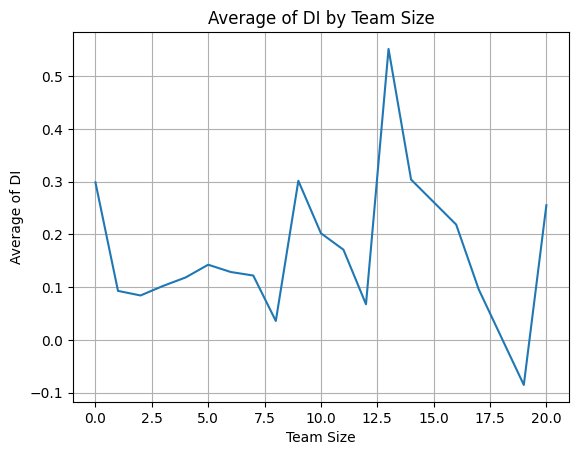

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()